In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

Import trademark and SEC data

In [4]:
trademark = pd.read_csv("Trademark data compiled.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2,9,12,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
sec_list = pd.read_csv("sec_list.csv")

Preliminary data analysis on the SEC list

In [6]:
sec_list.head() #First 5 companies in the list

,cik,companyName,stockSymbol
0,0001009891,AIR INDUSTRIES GROUP,airi
1,0001662972,"Blackstone Real Estate Income Trust, Inc.",breit_priv
2,0001451654,"Petrosonic Energy, Inc.",pson
3,0000093314,Volitionrx Ltd,vnrx
4,0000722077,Amc Entertainment Inc,aen


In [7]:
trademark.head()

,Unnamed: 0,serial_no,ir_auto_reg_dt,filing_dt,registration_dt,related_other_in,own_addr_1,own_addr_2,own_addr_city,own_composed_of,...,own_nalty_country_cd,own_nalty_other_cd,own_nalty_state_cd,own_addr_other_cd,own_name,own_type_cd,own_addr_postal,own_addr_state_cd,own_id,total_prior_marks
0,79,70019678,NaN,1891-05-12,1891-06-09,0.0,700 SYLVAN AVENUE,INTERNATIONAL PLAZA,ENGLEWOOD CLIFFS,NaN,...,NaN,NaN,DE,NaN,BESTFOODS,47.0,07632,NJ,73.0,1.0
1,81,70019678,NaN,1891-05-12,1891-06-09,0.0,NaN,208 SOUTH STREET,New York,NaN,...,NaN,NaN,KY,NaN,National Starch Manufacturing CompanyTHE,30.0,NaN,NY,75.0,1.0
2,82,70019679,NaN,1891-05-12,1891-06-09,0.0,1 JOHN STREET,NaN,CLINTON,NaN,...,NaN,NaN,DE,NaN,"UNILEVER SUPPLY CHAIN, INC.",42.0,06413,CT,76.0,1.0
3,83,70019679,NaN,1891-05-12,1891-06-09,0.0,700 SYLVAN AVENUE,INTERNATIONAL PLAZA,ENGLEWOOD CLIFFS,NaN,...,NaN,NaN,DE,NaN,BESTFOODS,41.0,07632,NJ,77.0,1.0
4,85,70019679,NaN,1891-05-12,1891-06-09,0.0,NaN,NaN,New York,NaN,...,NaN,NaN,KY,NaN,National Starch Manufacturing Company; The,30.0,NaN,NY,79.0,1.0


In [8]:
print("The list has: ", sec_list.index.nunique(), "unique companies in it.")

The list has:  12955 unique companies in it.


We are now going to check if we take a random company from the SEC List, if we can find the data from the trademark dataset. To do this, we will change the company name to lowercase as we can see above that some of the data is in lowercase. We will do the same for the own_name column in trademark dataset. We will also remove any unnecessary characters found at the end of the SEC list and in the own_name column of the USPTO data.

In [9]:
trademark['own_name_clean'] = trademark['own_name'].str.lower()
trademark['own_name_clean'] = trademark['own_name_clean'].str.strip()

In [10]:
sec_list['company_clean'] = sec_list['companyName'].str.lower()
sec_list['company_clean'] = sec_list['company_clean'].str.strip()

In [135]:
trademark['own_name_clean'].nunique() # NUmber of unique names in trademark own name

223180

In [11]:
sec_list['company_clean'].nunique() #Number of unique names in sec list 

12927

In [12]:
sec_list['company_clean'] = sec_list['company_clean'].str.strip()

In [13]:
re_remove = r'[^a-zA-Z\d\s]'
remove_inc = r' inc.*'
remove_ltd = r' ltd.*'
remove_corp = r' corp.*'
remove_co = r' co\.'
remove_the_end = r'the$'
remove_the_beg = r'^the'


sec_list['company_clean'] = sec_list['company_clean'].str.replace(re_remove, '')
sec_list['company_clean'] = sec_list['company_clean'].str.replace(remove_inc, '')
sec_list['company_clean'] = sec_list['company_clean'].str.replace(remove_ltd, '')
sec_list['company_clean'] = sec_list['company_clean'].str.replace(remove_corp, '')




trademark['own_name_clean'] = trademark['own_name_clean'].str.replace(re_remove, '')
trademark['own_name_clean'] = trademark['own_name_clean'].str.replace(remove_inc, '')
trademark['own_name_clean'] = trademark['own_name_clean'].str.replace(remove_ltd, '')
trademark['own_name_clean'] = trademark['own_name_clean'].str.replace(remove_corp, '')








In [17]:
print("Number of unique names in own_name after cleaning " + str(trademark['own_name_clean'].nunique())) 
print("Number of unique names in SEC list after cleaning " +  str(sec_list['company_clean'].nunique()))

Number of unique names in own_name after cleaning 201956
Number of unique names in SEC list after cleaning 12821


In [16]:
sec_list.head()

,cik,companyName,stockSymbol,company_clean
0,0001009891,AIR INDUSTRIES GROUP,airi,air industries group
1,0001662972,"Blackstone Real Estate Income Trust, Inc.",breit_priv,blackstone real estate
2,0001451654,"Petrosonic Energy, Inc.",pson,petrosonic energy
3,0000093314,Volitionrx Ltd,vnrx,volitionrx
4,0000722077,Amc Entertainment Inc,aen,amc entertainment


In [18]:
trademark.head()

,Unnamed: 0,serial_no,ir_auto_reg_dt,filing_dt,registration_dt,related_other_in,own_addr_1,own_addr_2,own_addr_city,own_composed_of,...,own_nalty_other_cd,own_nalty_state_cd,own_addr_other_cd,own_name,own_type_cd,own_addr_postal,own_addr_state_cd,own_id,total_prior_marks,own_name_clean
0,79,70019678,NaN,1891-05-12,1891-06-09,0.0,700 SYLVAN AVENUE,INTERNATIONAL PLAZA,ENGLEWOOD CLIFFS,NaN,...,NaN,DE,NaN,BESTFOODS,47.0,07632,NJ,73.0,1.0,bestfoods
1,81,70019678,NaN,1891-05-12,1891-06-09,0.0,NaN,208 SOUTH STREET,New York,NaN,...,NaN,KY,NaN,National Starch Manufacturing CompanyTHE,30.0,NaN,NY,75.0,1.0,national starch manufacturing companythe
2,82,70019679,NaN,1891-05-12,1891-06-09,0.0,1 JOHN STREET,NaN,CLINTON,NaN,...,NaN,DE,NaN,"UNILEVER SUPPLY CHAIN, INC.",42.0,06413,CT,76.0,1.0,unilever supply chain
3,83,70019679,NaN,1891-05-12,1891-06-09,0.0,700 SYLVAN AVENUE,INTERNATIONAL PLAZA,ENGLEWOOD CLIFFS,NaN,...,NaN,DE,NaN,BESTFOODS,41.0,07632,NJ,77.0,1.0,bestfoods
4,85,70019679,NaN,1891-05-12,1891-06-09,0.0,NaN,NaN,New York,NaN,...,NaN,KY,NaN,National Starch Manufacturing Company; The,30.0,NaN,NY,79.0,1.0,national starch manufacturing company the


Start merging the cells to find companies names found in both datasets.

In [19]:
merged = sec_list.merge(trademark, left_on = sec_list['company_clean'], right_on = trademark['own_name_clean'], how = 'inner')

In [20]:
merged['own_name'].nunique()

6140

In [21]:
merged['companyName'].nunique()

3391

In [22]:
merged = merged.sort_values(by = ['total_prior_marks'], ascending = False)

In [23]:
merged.head()

,key_0,cik,companyName,stockSymbol,company_clean,Unnamed: 0,serial_no,ir_auto_reg_dt,filing_dt,registration_dt,...,own_nalty_other_cd,own_nalty_state_cd,own_addr_other_cd,own_name,own_type_cd,own_addr_postal,own_addr_state_cd,own_id,total_prior_marks,own_name_clean
113878,mattel,0000063276,Mattel Inc /DE/,mat,mattel,9109268,76448735,NaN,2002-09-12,NaN,...,NaN,DE,NaN,"MATTEL, INC.",11.0,90245,CA,7683832.0,83.0,mattel
113861,mattel,0000063276,Mattel Inc /DE/,mat,mattel,9109251,76448735,NaN,2002-09-12,NaN,...,NaN,DE,NaN,"MATTEL, INC.",11.0,90245,CA,7683832.0,83.0,mattel
113859,mattel,0000063276,Mattel Inc /DE/,mat,mattel,9109249,76448735,NaN,2002-09-12,NaN,...,NaN,DE,NaN,"MATTEL, INC.",11.0,90245,CA,7683832.0,83.0,mattel
113858,mattel,0000063276,Mattel Inc /DE/,mat,mattel,9109248,76448735,NaN,2002-09-12,NaN,...,NaN,DE,NaN,"MATTEL, INC.",11.0,90245,CA,7683832.0,83.0,mattel
113857,mattel,0000063276,Mattel Inc /DE/,mat,mattel,9109247,76448735,NaN,2002-09-12,NaN,...,NaN,DE,NaN,"MATTEL, INC.",11.0,90245,CA,7683832.0,83.0,mattel


Extract relevant columns

In [24]:
companies = merged[['companyName', 'own_name', 'stockSymbol', 'total_prior_marks']]

In [25]:
companies = companies.rename(columns = {"companyName":"SEC List Name", "own_name": "USPTO name"})

In [26]:
merged.head()

,key_0,cik,companyName,stockSymbol,company_clean,Unnamed: 0,serial_no,ir_auto_reg_dt,filing_dt,registration_dt,...,own_nalty_other_cd,own_nalty_state_cd,own_addr_other_cd,own_name,own_type_cd,own_addr_postal,own_addr_state_cd,own_id,total_prior_marks,own_name_clean
113878,mattel,0000063276,Mattel Inc /DE/,mat,mattel,9109268,76448735,NaN,2002-09-12,NaN,...,NaN,DE,NaN,"MATTEL, INC.",11.0,90245,CA,7683832.0,83.0,mattel
113861,mattel,0000063276,Mattel Inc /DE/,mat,mattel,9109251,76448735,NaN,2002-09-12,NaN,...,NaN,DE,NaN,"MATTEL, INC.",11.0,90245,CA,7683832.0,83.0,mattel
113859,mattel,0000063276,Mattel Inc /DE/,mat,mattel,9109249,76448735,NaN,2002-09-12,NaN,...,NaN,DE,NaN,"MATTEL, INC.",11.0,90245,CA,7683832.0,83.0,mattel
113858,mattel,0000063276,Mattel Inc /DE/,mat,mattel,9109248,76448735,NaN,2002-09-12,NaN,...,NaN,DE,NaN,"MATTEL, INC.",11.0,90245,CA,7683832.0,83.0,mattel
113857,mattel,0000063276,Mattel Inc /DE/,mat,mattel,9109247,76448735,NaN,2002-09-12,NaN,...,NaN,DE,NaN,"MATTEL, INC.",11.0,90245,CA,7683832.0,83.0,mattel


In [27]:
companies = companies.drop_duplicates(subset = ['SEC List Name'])

In [153]:
companies = companies.reset_index(drop = True)

In [30]:
print("Number of companies extracted: " + str(len(companies)))

Number of companies extracted: 3391


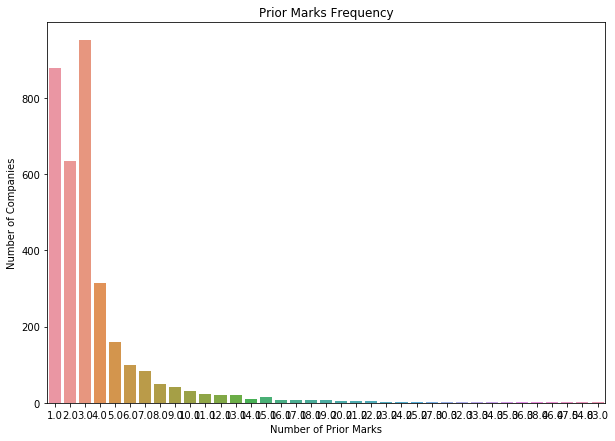

In [156]:
plt.figure(figsize=(10,7))
sns.countplot(companies['total_prior_marks'])
plt.title('Prior Marks Frequency')
plt.xlabel('Number of Prior Marks')
plt.ylabel('Number of Companies')
plt.savefig('graph.png')


In [157]:
companies.to_csv('SEC_USPTO_companies.csv')

In [158]:
merged.to_csv("USPTO_SEC_data.csv")

In [159]:
merged.head()

,key_0,cik,companyName,stockSymbol,company_clean,Unnamed: 0,serial_no,ir_auto_reg_dt,filing_dt,registration_dt,...,own_nalty_other_cd,own_nalty_state_cd,own_addr_other_cd,own_name,own_type_cd,own_addr_postal,own_addr_state_cd,own_id,total_prior_marks,own_name_clean
113878,mattel,0000063276,Mattel Inc /DE/,mat,mattel,9109268,76448735,NaN,2002-09-12,NaN,...,NaN,DE,NaN,"MATTEL, INC.",11.0,90245,CA,7683832.0,83.0,mattel
113861,mattel,0000063276,Mattel Inc /DE/,mat,mattel,9109251,76448735,NaN,2002-09-12,NaN,...,NaN,DE,NaN,"MATTEL, INC.",11.0,90245,CA,7683832.0,83.0,mattel
113859,mattel,0000063276,Mattel Inc /DE/,mat,mattel,9109249,76448735,NaN,2002-09-12,NaN,...,NaN,DE,NaN,"MATTEL, INC.",11.0,90245,CA,7683832.0,83.0,mattel
113858,mattel,0000063276,Mattel Inc /DE/,mat,mattel,9109248,76448735,NaN,2002-09-12,NaN,...,NaN,DE,NaN,"MATTEL, INC.",11.0,90245,CA,7683832.0,83.0,mattel
113857,mattel,0000063276,Mattel Inc /DE/,mat,mattel,9109247,76448735,NaN,2002-09-12,NaN,...,NaN,DE,NaN,"MATTEL, INC.",11.0,90245,CA,7683832.0,83.0,mattel
